## Este trabalho é baseado no curso disponivel em http://course.fast.ai utilizando a lição 2 como base, onde o mesmo é dividido em:

    [] Criar um dataset a partir do Google Images;
    [] Treinar o modelo com o novo dataset
    [] Fazer o ajuste fino (fine tuning)
    [] Interpretar os resultados
    [] Testar o modelo e preparar pra colocar em produção

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [1]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [2]:
import os

In [3]:
os.getcwd()

'/home/cid/Downloads/Fastai/course-v3/nbs/dl1'

In [7]:
path = Path('/home/cid/Downloads/Guitarra/Data/')

In [8]:
path

PosixPath('/home/cid/Downloads/Guitarra/Data')

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

### Definindo o diretório das imagens e realizando o download atraves dos links gerados no passo anterior

In [9]:
folder = 'stratocaster'
file = 'stratocaster_link.txt'

In [10]:
path = Path('/home/cid/Downloads/Guitarra/Data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [15]:
folder = 'telecaster'
file = 'telecaster_link.txt'

In [16]:
path = Path('/home/cid/Downloads/Guitarra/Data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [20]:
folder = 'lespaul'
file = 'lespaul_link.txt'

In [21]:
path = Path('/home/cid/Downloads/Guitarra/Data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

You will need to run this cell once per each category.

In [22]:
path.ls()

[PosixPath('/home/cid/Downloads/Guitarra/Data/telecaster'),
 PosixPath('/home/cid/Downloads/Guitarra/Data/telecaster_link.txt'),
 PosixPath('/home/cid/Downloads/Guitarra/Data/lespaul'),
 PosixPath('/home/cid/Downloads/Guitarra/Data/stratocaster_link.txt'),
 PosixPath('/home/cid/Downloads/Guitarra/Data/lespaul_link.txt'),
 PosixPath('/home/cid/Downloads/Guitarra/Data/stratocaster')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [23]:
#classes = ['teddys','grizzly','black']
classes = ['telecaster','stratocaster', 'lespaul']

In [ ]:
#a função recebe  o caminho dos arquivos com os links, define a pasta de destino 
#e a qtd de imagens a serem baixadas
download_images(path/file, dest, max_pics=350)

In [22]:
# If you have problems download, try with `max_workers=0` to see exceptions:
#utilizar este passo em caso de falha, o parametro max_workers=0 soluciona erro comuns em ambiente windows
#download_images(path/file, dest, max_pics=30, max_workers=0)

Then we can remove any images that can't be opened:

### Removendo as imagens que não podeuderem ser abertas

In [26]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

telecaster


stratocaster


lespaul


### Dataset preparado, as imagens podem ser abertas sem problemas

## View data

## Visualizando uma amostra das imagens

In [27]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [29]:
#usar esta celular caso realizado o limpeza dos dados com a função ImageCleaner
# If you already cleaned your data, run this cell instead of the one before
#np.random.seed(42)
#data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#        ds_tfms=get_transforms(), size=224, num_workers=4, no_check=True).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [30]:
data.classes

['lespaul', 'stratocaster', 'telecaster']

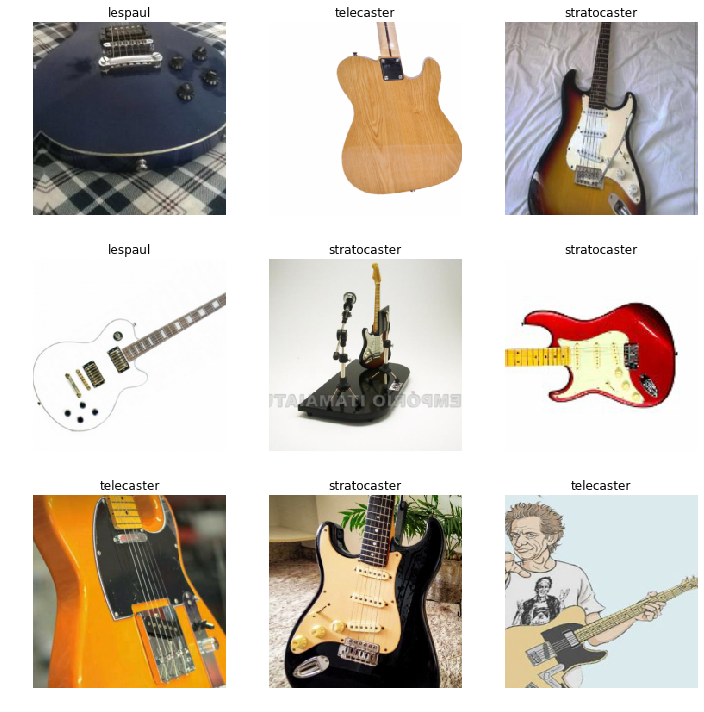

In [31]:
data.show_batch(rows=3, figsize=(10,10))

### Verificando as classes e o tamanho dos datasets (treino, e validação)

In [32]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['lespaul', 'stratocaster', 'telecaster'], 3, 652, 163)

## Train model

### Treinando o modelo utilizando a ResNET34

In [33]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])

In [34]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.195440,0.902792,0.613497,0.386503,01:05
1,0.947737,0.730545,0.711656,0.288344,01:05
2,0.801618,0.702057,0.748466,0.251534,01:06
3,0.715556,0.674555,0.766871,0.233129,01:10
4,0.649418,0.667685,0.773006,0.226994,01:17


In [35]:
#salvando o estado do treinamento caso precise utiliza-lo novamente
learn.save('stage-1')

In [36]:
#descongelando as primeiras camadas da rede neural
learn.unfreeze()

In [37]:
#Avaliando a curva de aprendizado
learn.lr_find(stop_div=False, num_it=25)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-04


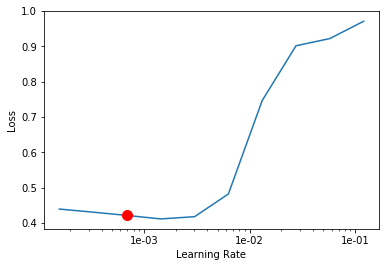

In [39]:
#Avaliando a melhor taxa de aprendizagem
learn.recorder.plot(suggestion=True)

In [40]:
#Treinando o modelo novamente definindo 
learn.fit_one_cycle(5, max_lr=slice(1e-04,1e-03))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.486367,0.638434,0.760736,0.239264,01:47
1,0.392520,0.772233,0.742331,0.257669,01:37
2,0.338394,1.002049,0.730061,0.269939,01:42
3,0.285612,0.755362,0.797546,0.202454,01:41
4,0.234030,0.629102,0.809816,0.190184,01:43


In [41]:
#salvando o estado do modelo caso seja necessário reutiliza-lo
learn.save('stage-2')

## Interpretation

## Interpretando os resultados

In [42]:
#Carregando o modelo salvo anteriormente
learn.load('stage-2');

In [43]:
interp = ClassificationInterpretation.from_learner(learn)

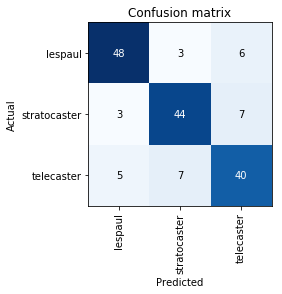

In [45]:
#Exibindo a matriz de confusão - essa matriz demonstra os erros e os acertos do modelo
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

## Limpando os dados

In [46]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

Tradução automatica (by Google translator)
Primeiro, precisamos obter os caminhos de arquivo de nossos top_losses. Nós podemos fazer isso com .from_toplosses. Em seguida, alimentamos os principais índices de perdas e o conjunto de dados correspondente para o ImageCleaner.

Observe que o widget não excluirá imagens diretamente do disco, mas criará um novo arquivo csv cleaned.csv, de onde você poderá criar um novo ImageDataBunch com os rótulos corrigidos para continuar treinando seu modelo.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

Para limpar todo o conjunto de imagens, precisamos criar um novo conjunto de dados sem a divisão. A palestra de vídeo demonstrou o uso do parâmetro ds_type, que não tem mais efeito algum. Veja o tópico para mais detalhes.

In [47]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [51]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.
#utilizar essa celular ao inves da anterior caso ja tenha realizado limepza dos top_losses
#rodar esta celular antes de proceder para a remoção das celular duplicadas


db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                    .split_none()
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch()
      )

Then we create a new learner to use our new databunch with all the images.

In [52]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [53]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [54]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

Marque as fotos para exclusão clicando em "Excluir". Em seguida, clique em "Próximo lote" para excluir fotos sinalizadas e mantenha o restante nessa linha. O ImageCleaner mostrará uma nova linha de imagens até que não haja mais nada para mostrar. Nesse caso, o widget mostrará imagens até que não haja mais nada de top_losses.ImageCleaner (ds, idxs)

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Você também pode encontrar duplicatas no seu conjunto de dados e excluí-las! Para fazer isso, você precisa executar .from_similars para obter os ids de duplicatas em potencial e, em seguida, executar o ImageCleaner com duplicatas = True. A API funciona de maneira semelhante à das imagens classificadas erroneamente: basta escolher as que você deseja excluir e clicar em "Próximo lote" até que não haja mais imagens.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, loosing all the results from cleaning the data from toplosses.

Lembre-se de recriar o banco de dados e o learn_cln no arquivo cleaned.csv. Caso contrário, o arquivo seria substituído do zero, perdendo todos os resultados da limpeza dos dados de toplosses.

In [ ]:
#prepara para verificar imagens duplicadas
ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [ ]:
#rodar apenas para identificar imagens duplicadas
ImageCleaner(ds, idxs, path, duplicates=True)

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

Lembre-se de recriar seu ImageDataBunch de seu clean.csv para incluir as alterações feitas nos seus dados!

## Putting your model in production

### Colocando o modelo em produção

First thing first, let's export the content of our `Learner` object for production:

Primeiro, vamos exportar o conteúdo do nosso objeto Learner para produção:

In [55]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

Isso criará um arquivo chamado 'export.pkl' no diretório em que estávamos trabalhando, que contém tudo o que precisamos para implantar nosso modelo (o modelo, os pesos, mas também alguns metadados como as classes ou as transformações / normalizações usadas).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

Você provavelmente quer usar a CPU para inferência, exceto em escala maciça (e você quase certamente não precisa treinar em tempo real). Se você não tem uma GPU que acontece automaticamente. Você pode testar seu modelo na CPU da seguinte forma:

## Testando o modelo em produção

### Como vamos utilizar apenas uma imagem para teste não é necessário utilização da GPU

In [56]:
defaults.device = torch.device('cpu')

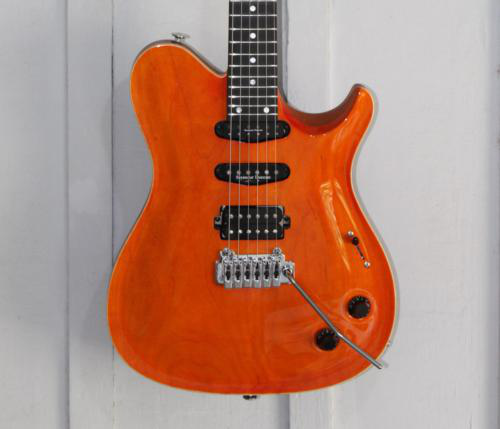

In [57]:
img = open_image(path/'telecaster'/'00000105.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

Criamos o nosso Learner no ambiente de produção como este, apenas certifique-se de que o caminho contenha o arquivo 'export.pkl' de antes.

In [58]:
learn = load_learner(path)

In [59]:
pred_class,pred_idx,outputs = learn.predict(img)
print('Sua guitarra é uma: ', pred_class)

Sua guitarra é uma:  telecaster


So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

## Coisas que podem dar errado


- Na maioria das vezes as coisas vão treinar bem com os padrões
- Não há muito que você realmente precise sintonizar (além do que você já viu!)
- O mais provável é
    -Taxa de Aprendizagem
    - Número de épocas

### Learning rate (LR) too high

## Taxa de aprendizado (LR) muito alta

In [60]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [61]:
learn.fit_one_cycle(3, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,6.985207,386608064.000000,0.680982,01:06
1,14.249723,1189841.250000,0.668712,01:08
2,13.075098,2110.276611,0.717791,01:09


### Learning rate (LR) too low

## Taxa de aprendizados muito baixa

Previously we had this result:
(Vejamos os resultados anteriores para comparação)

```
epoch	train_loss	valid_loss	accuracy	error_rate	time
0	0.486367	0.638434	0.760736	0.239264	01:47
1	0.392520	0.772233	0.742331	0.257669	01:37
2	0.338394	1.002049	0.730061	0.269939	01:42
3	0.285612	0.755362	0.797546	0.202454	01:41
4	0.234030	0.629102	0.809816	0.190184	01:43
```

In [62]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,8.873295,10.659644,0.619632,01:07
1,9.212196,6.386158,0.613497,01:09
2,9.147758,6.880398,0.552147,01:07
3,9.127276,7.230528,0.582822,01:08
4,9.157617,7.287418,0.588957,01:14


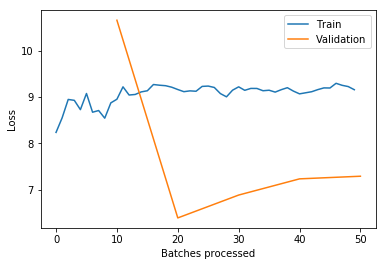

In [63]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

Além de levar muito tempo, ele está muitas vezes com a mesma imagem, então pode haver overfit.

### Too few epochs

### Muito poucas épocas

In [64]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [65]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.449382,1.112871,0.613497,01:41


### Too many epochs

### Epocas demais

Pode resultar também em overfit, uma vez que as imagens são verificadas pelo modelo mais de uma vez deste modo o modelo pode vir a 'decorar' a classificação das imagens.

Apos algumas epocas a a taxa de erro `error_rate` se estabiliza num mesmo valor

In [67]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=12, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [69]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [70]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.281871,1.192508,0.645293,00:46
1,1.286816,1.167102,0.622101,00:43
2,1.211115,1.153971,0.586630,00:43
3,1.175456,1.151078,0.556617,00:42
4,1.157661,1.136273,0.563438,00:43
5,1.123273,1.113818,0.544338,00:43
6,1.056268,1.081441,0.517053,00:42
7,1.001450,1.055076,0.506139,00:43
8,0.939373,1.029040,0.482947,00:41
9,0.864786,1.002241,0.462483,00:41


Thank you @Jeremy https://twitter.com/jeremyphoward

Obrigado aos instrutores do curso de Fast.ai no TCU (Erick Muzzart e Fernando Mello)

Thanks Google for Images and Translations ;)